In [57]:
# 基础数据科学运算库
import numpy as np
import pandas as pd

# 可视化库
import seaborn as sns
import matplotlib.pyplot as plt

# 时间模块
import time

# sklearn库
# 数据预处理
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# 实用函数
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# 常用评估器
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# 网格搜索
from sklearn.model_selection import GridSearchCV

# 自定义评估器支持模块
from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 自定义模块
from telcoFunc import *


## 数据导入

In [60]:
tcc = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [61]:
tcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 用户流失背景与建模目标
&emsp;&emsp;电信市场的竞争越来越激烈，在数字化时代，传统的广泛市场营销策略逐渐失去效果，如今，基于客户的个人信息和行为进行精确的营销成为了迫切需求。这样的营销策略不仅能更好地满足用户日益增长的多样化、分层和个性化需求，也是电信运营商面临的一个关键挑战。同时，考虑到电信行业的公众客户（包括个人和家庭用户）特点，如变化快、成长性和可替代性，加上用户对电信产品的需求弹性较低以及购买周期较长，使得电信公司在吸引新客户和扩大市场份额方面面临较高成本。因此，保持现有用户的忠诚度和防止用户流失成为了重要的运营战略。

&emsp;&emsp;当然，用户流失受到许多偶然因素的影响，但通过数字化地分析用户的属性和行为，我们可以从中发现潜在的流失风险。更关键的是，如果能够实时获得这些数据，并利用模型对未来的用户流失风险进行预测，就可以及时采取措施，制定有效的挽留策略，以防止用户流失的实际发生。
- 机器学习的建模目标
&emsp;&emsp;1.找出影响用户流失的重要因子，来辅助运营人员来进行营销策略调整或制定用户挽留措施
&emsp;&emsp;2.对未来的流失用户进行预测

## 数据解读与预处理

### 1.字段解释

In [62]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


根据Kaggle的数据介绍，各个字段的含义如下：

| 字段 | 解释 |
| ------ | ------ |
| customerID | 用户ID |
| gender | 性别 |
| SeniorCitizen | 是否是老年人（1代表是） |
| Partner | 是否有配偶（Yes or No） |
| Dependents | 是否经济独立（Yes or No） |
| tenure | 用户入网时间 |
| PhoneService | 是否开通电话业务（Yes or No） |
| MultipleLines | 是否开通多条电话业务（Yes 、 No or No phoneservice） |
| InternetService | 是否开通互联网服务（No、DSL数字网络或filber potic光线网络） |
| OnlineSecurity | 是否开通网络安全服务（Yes、No or No internetservice） |
| OnlineBackup | 是否开通在线备份服务（Yes、No or No internetservice） |
| DeviceProtection | 是否开通设备保护服务（Yes、No or No internetservice） |
| TechSupport | 是否开通技术支持业务（Yes、No or No internetservice）  |
| StreamingTV  | 是否开通网络电视（Yes、No or No internetservice） |
| StreamingMovies | 是否开通网络电影（Yes、No or No internetservice）  |
| Contract | 合同签订方式（按月、按年或者两年）  |
| PaperlessBilling | 是否开通电子账单（Yes or No）  |
| PaymentMethod | 付款方式（bank transfer、credit card、electronic check、mailed check） |
| MonthlyCharges | 月度费用 |
| TotalCharges | 总费用  |
| Churn | 是否流失（Yes or No） |

上述字段基本可以分为三类，分别是用户已注册的服务信息、用户账户信息和用户人口统计信息，三类字段划分情况如下：

- 用户人口统计信息：gender(性别)，SeniorCitizen(是否是老年人)，Partner(是否有配偶)，Dependents(是否经济独立)

- 用户已注册的服务信息：tenure(用户入网时间), PhoneService(是否开通电话业务), MultipleLines(是否开通多条电话业务), InternetService (是否开通互联网服务), OnlineSecurity(是否开通网络安全服务), OnlineBackup(是否开通在线备份服务), DeviceProtection(是否开通设备保护服务), TechSupport(是否开通技术支持业务), StreamingTV(是否开通网络电视), StreamingMovies(是否开通网络电影)

- 用户账户信息: Contract(合同签订方式), PaperlessBilling(是否开通电子账单), PaymentMethod(付款方式), MonthlyCharges(月度费用), TotalCharges(总费用)

### 2. 数据重复值检验

In [63]:
tcc.duplicated().sum()

0

该数据集没有重复值

In [64]:
# 分别标记离散字段，连续字段，标签
# 离散字段
category_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod']

# 连续字段
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 标签
target = 'Churn'

# 验证是否划分能完全
assert len(category_cols) + len(numeric_cols) + 1 == tcc.shape[1]

### 3.缺失值检验

进行初步的缺失值检验，以便为后续的异常值检验做好准备（异常值检验无法显示有缺失值的列）

In [65]:
tcc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

该数据集中有空格代表缺失值，所以需要对离散变量和连续变量进行进一步的检查，确定缺失值

In [66]:
tcc[category_cols].nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

离散字段中没有空格符，没有缺失值

In [67]:
tcc.MonthlyCharges = pd.to_numeric(tcc.MonthlyCharges, errors='coerce')

In [68]:
tcc.TotalCharges = pd.to_numeric(tcc.TotalCharges, errors='coerce')

In [69]:
tcc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [70]:
tcc[tcc.loc[:,'TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


这11条数据的入网时间都是0，这11位用户极有可能是在统计周期结束前的最后时间入网的用户，因此没有过去的总消费记录，但是却有当月的消费记录。可以将这11条记录的缺失值记录为0，以表示在最后一个月统计消费金额前，这些用户的过去总消费金额为0。

In [71]:
tcc.loc[:,'TotalCharges'] = tcc.loc[:,'TotalCharges'].fillna(0)

In [72]:
tcc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 4. 异常值检验

对于连续型变量，进行进一步的异常值检验

In [73]:
tcc[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


用箱线图进行异常点的识别

Text(0.5, 0, 'TotalCharges')

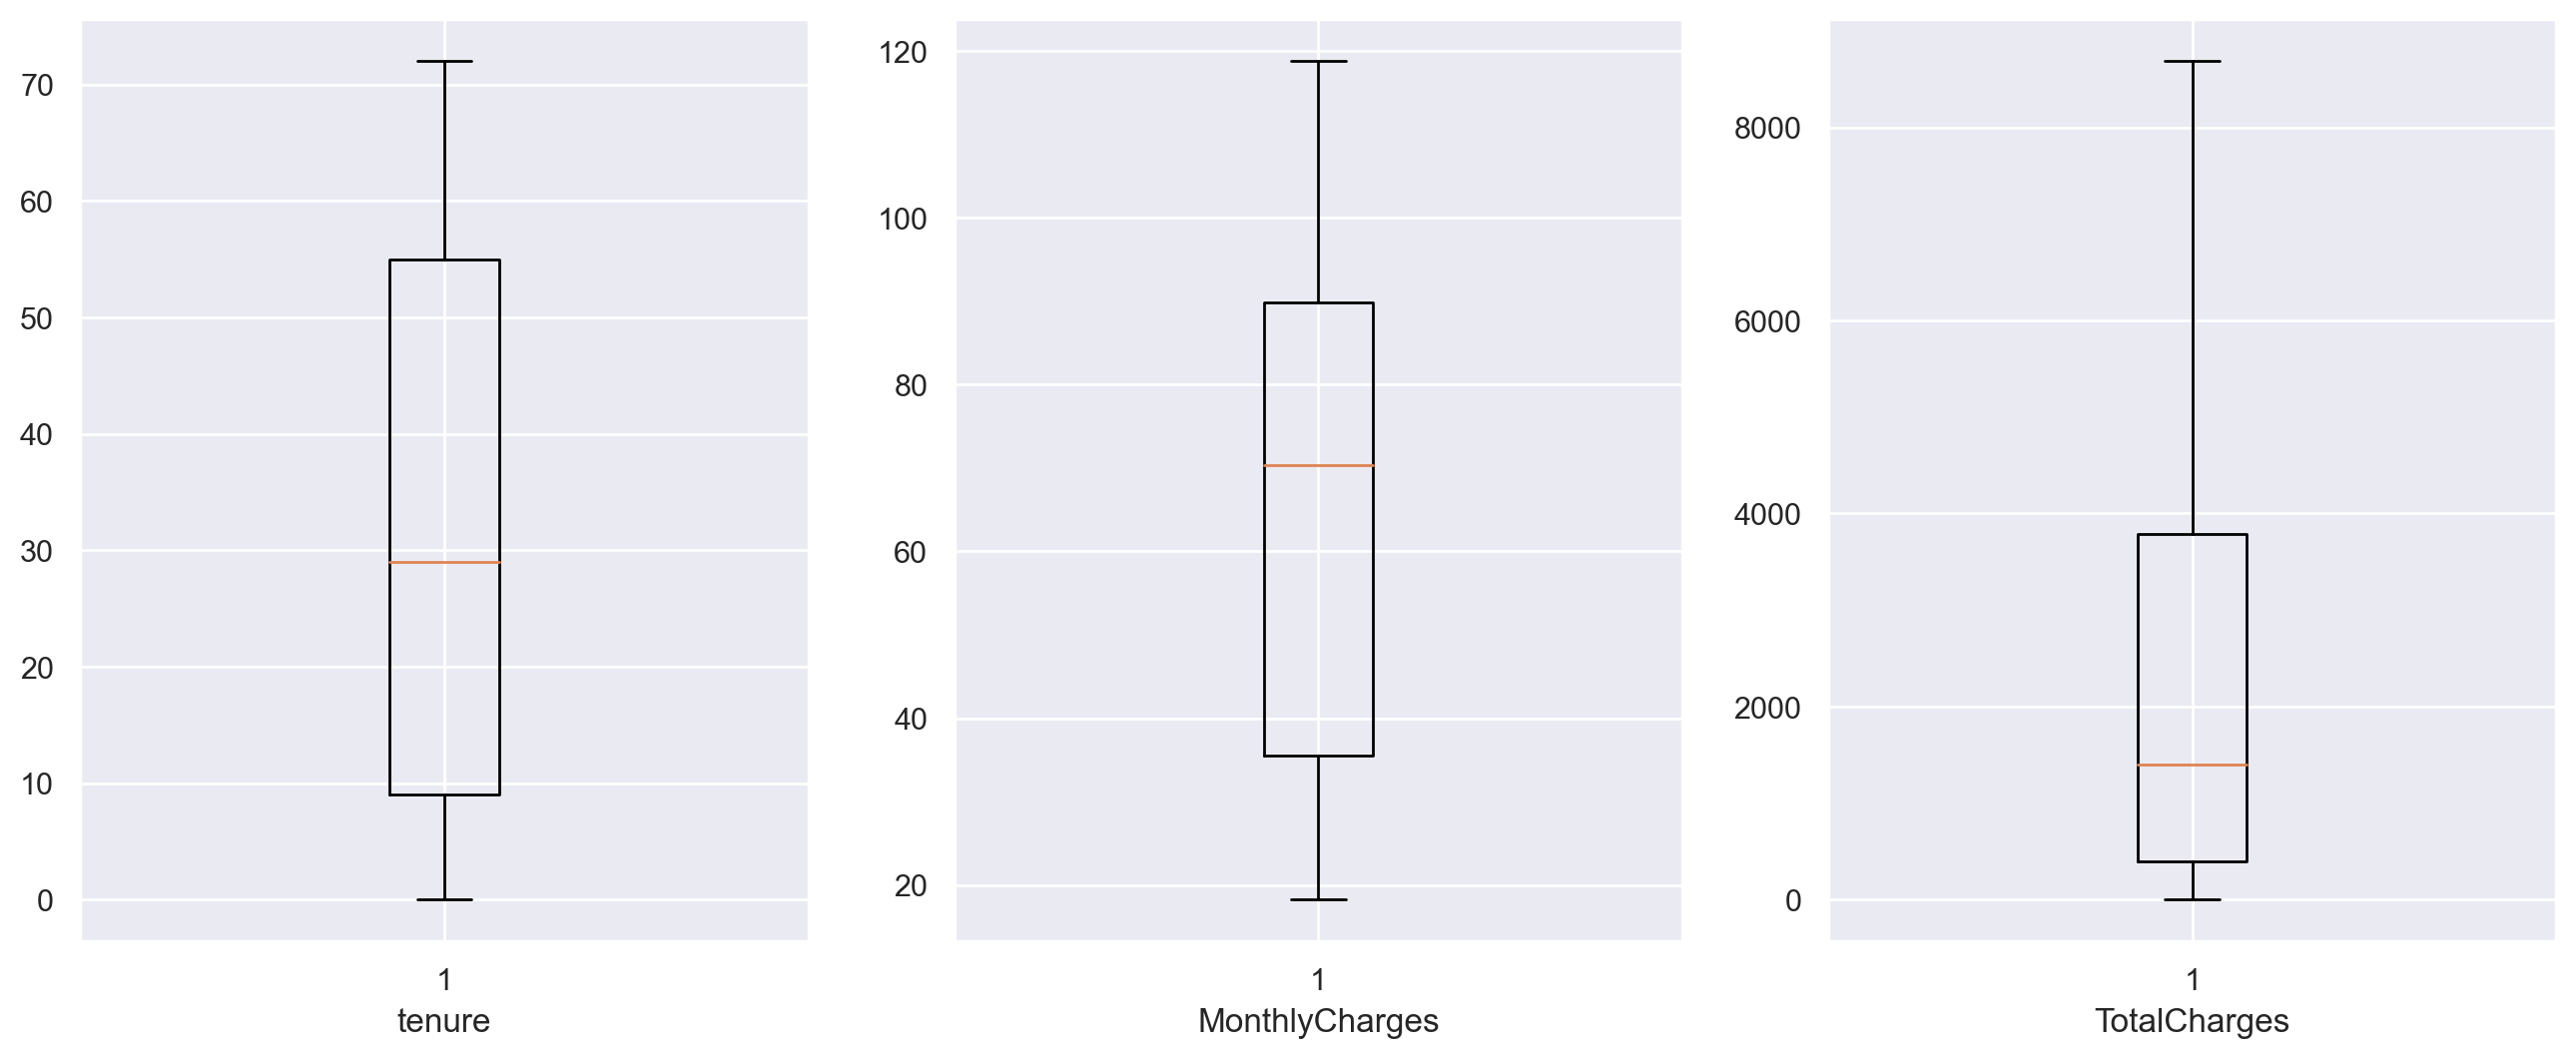

In [74]:
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(131)
plt.boxplot(tcc['tenure'])
plt.xlabel('tenure')
plt.subplot(132)
plt.boxplot(tcc['MonthlyCharges'])
plt.xlabel('MonthlyCharges')
plt.subplot(133)
plt.boxplot(tcc['TotalCharges'])
plt.xlabel('TotalCharges')

没有异常值

## 数据探索性分析

### 1.标签取值分布

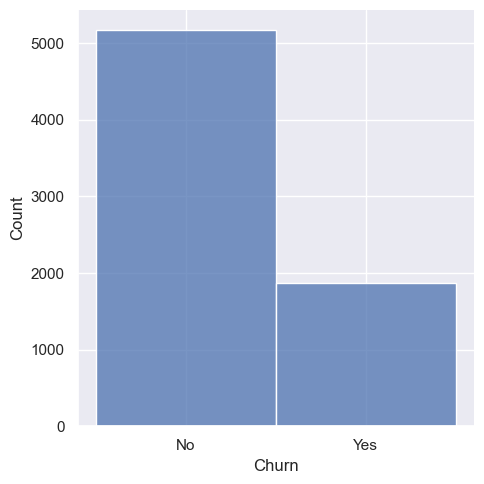

In [75]:
sns.displot(tcc.loc[:,"Churn"])

标签取值比例大概为3:1，具有轻微的不平衡分布

### 2.变量相关性分析

In [33]:
#剔除ID列
df3 = tcc.iloc[:,1:].copy()
#将标签yes/no转化为1/0
df3.loc[:,'Churn'].replace(to_replace='Yes', value = 1, inplace = True)
df3.loc[:,'Churn'].replace(to_replace='No', value =0, inplace = True)
#将其他离散变量转化为哑变量，连续变量不变
df_dummies = pd.get_dummies(df3)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [34]:
df_dummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

<Axes: >

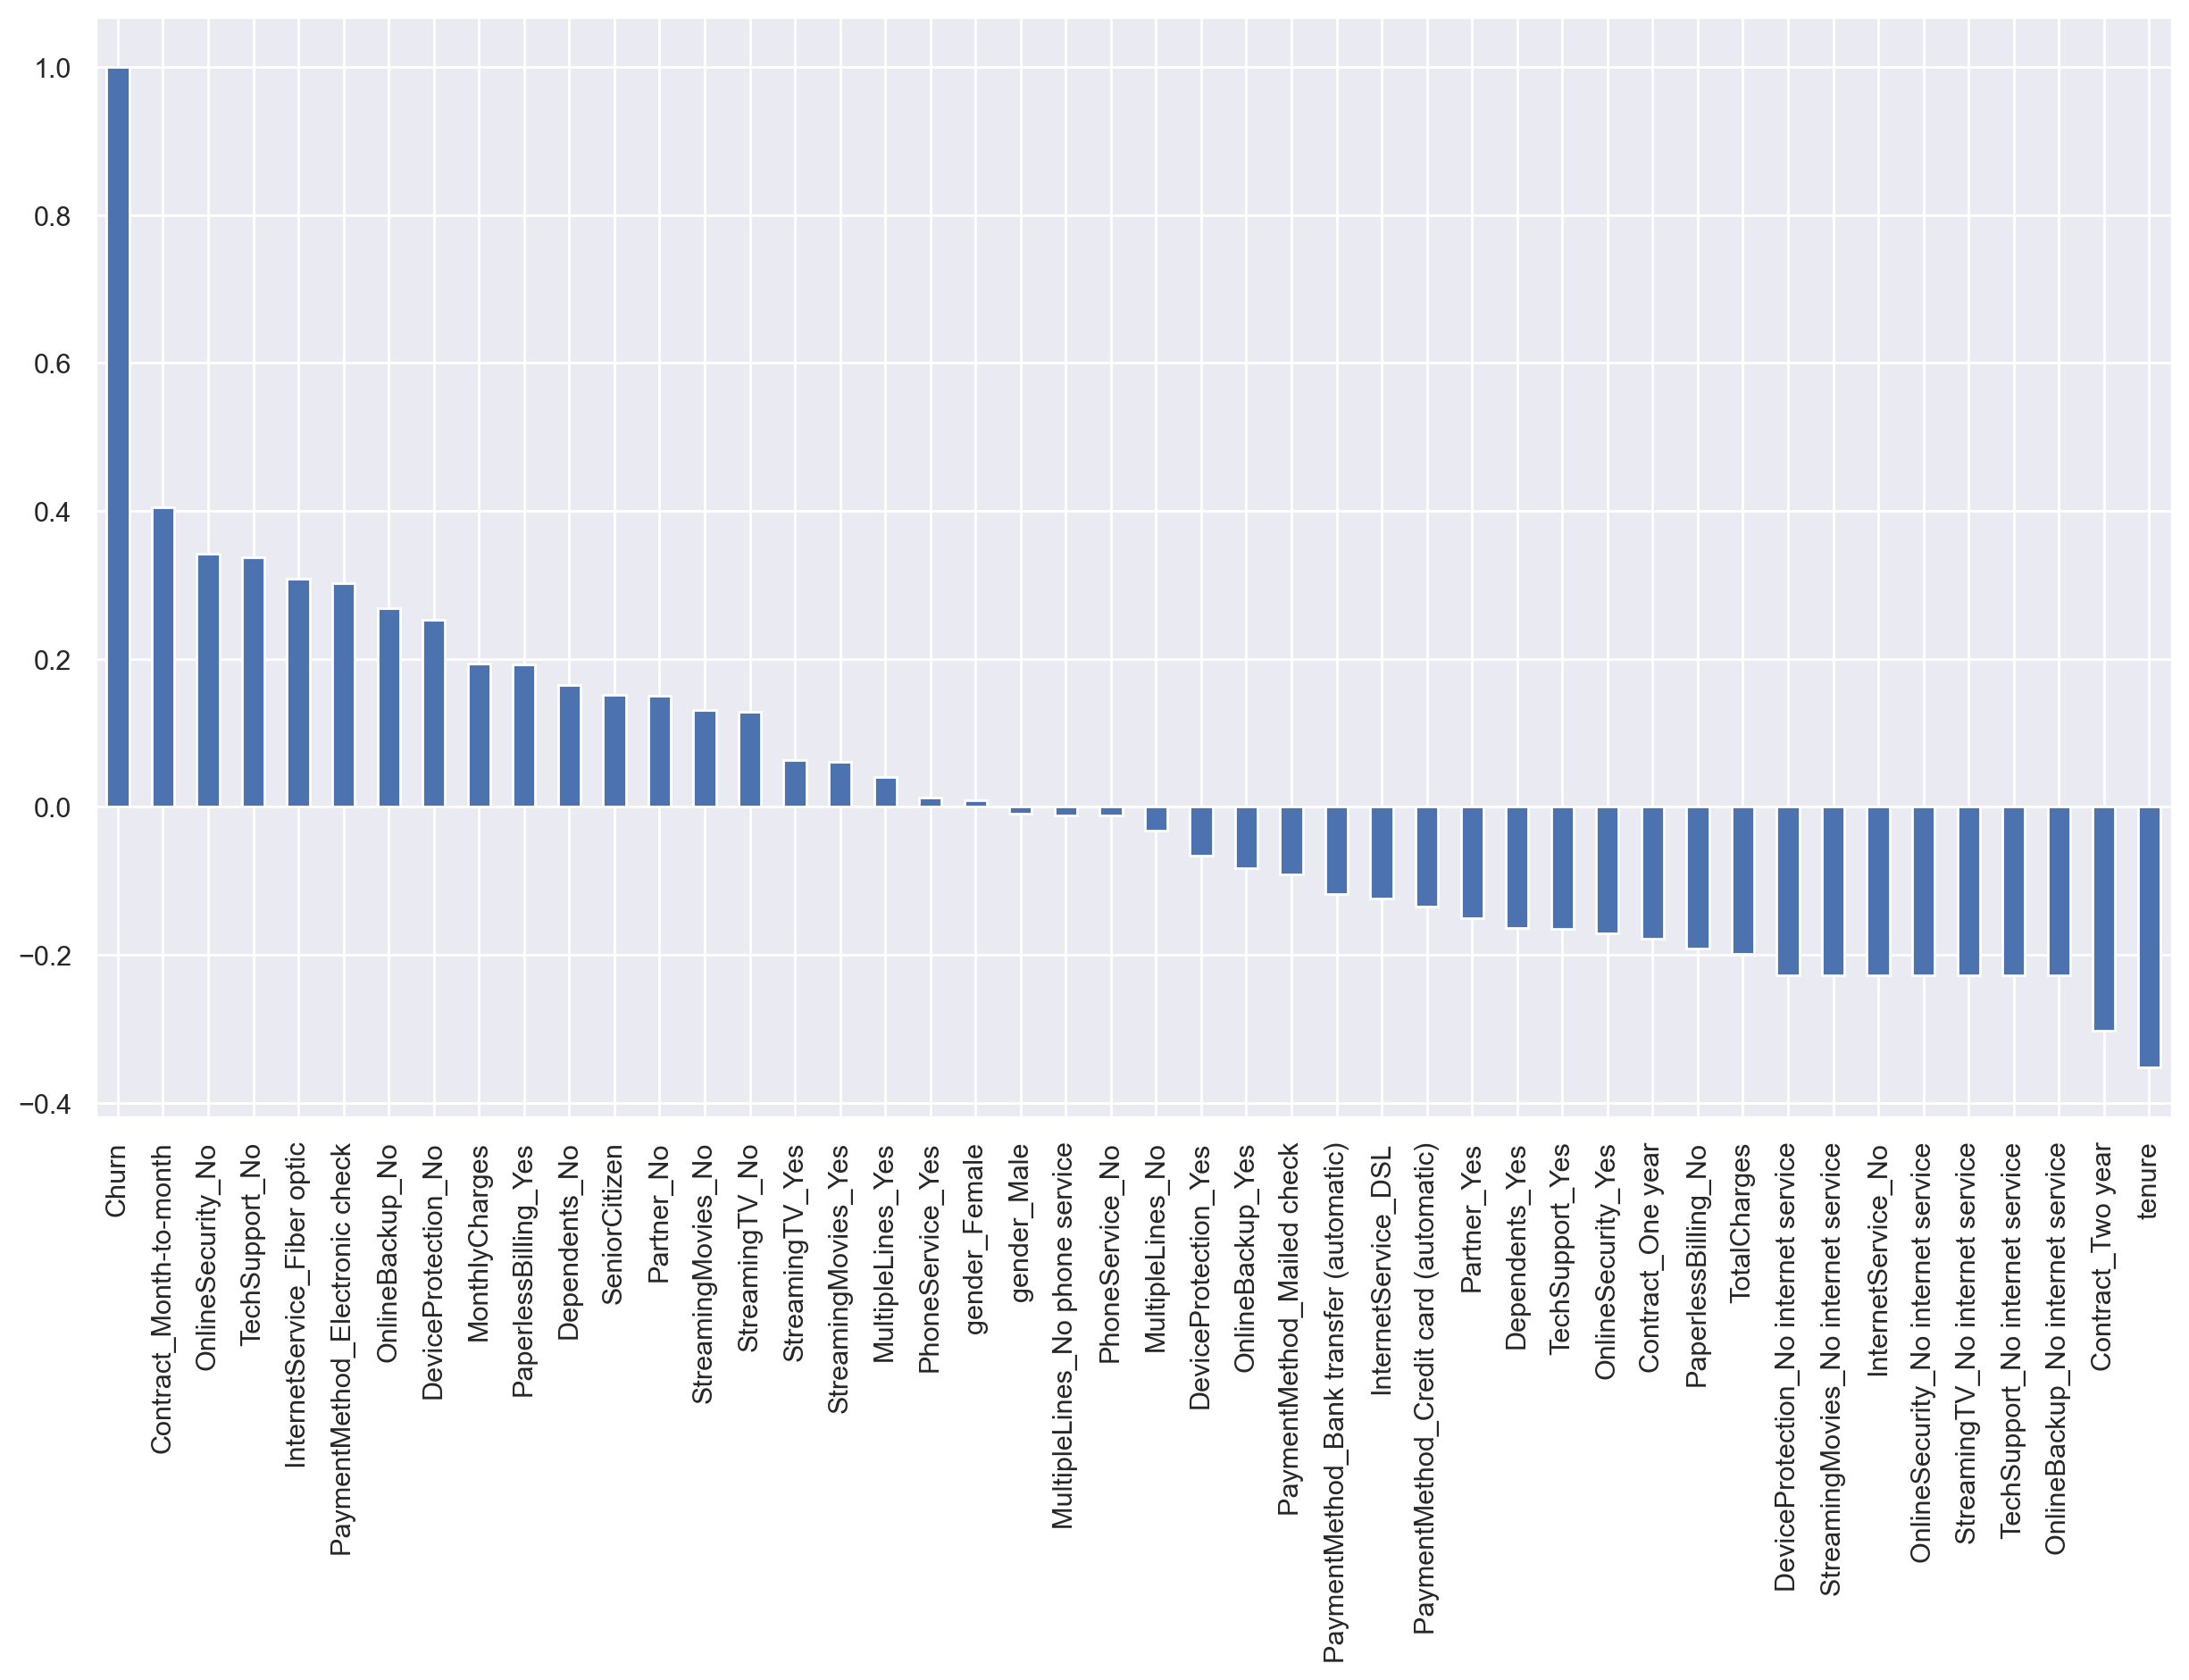

In [35]:
sns.set()
plt.figure(figsize=(15,8), dpi=200)
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

Contract字段的Month-to-month取值结果和最终流失的结果正相关性较大，Contract取值为Month-to-month的用户流失概率较大，而tenure和Churn负相关，则说明tenure取值越大，即用户入网时间越长，用户流失概率越小。

### 3.探索性数据分析

- 用户人口统计信息

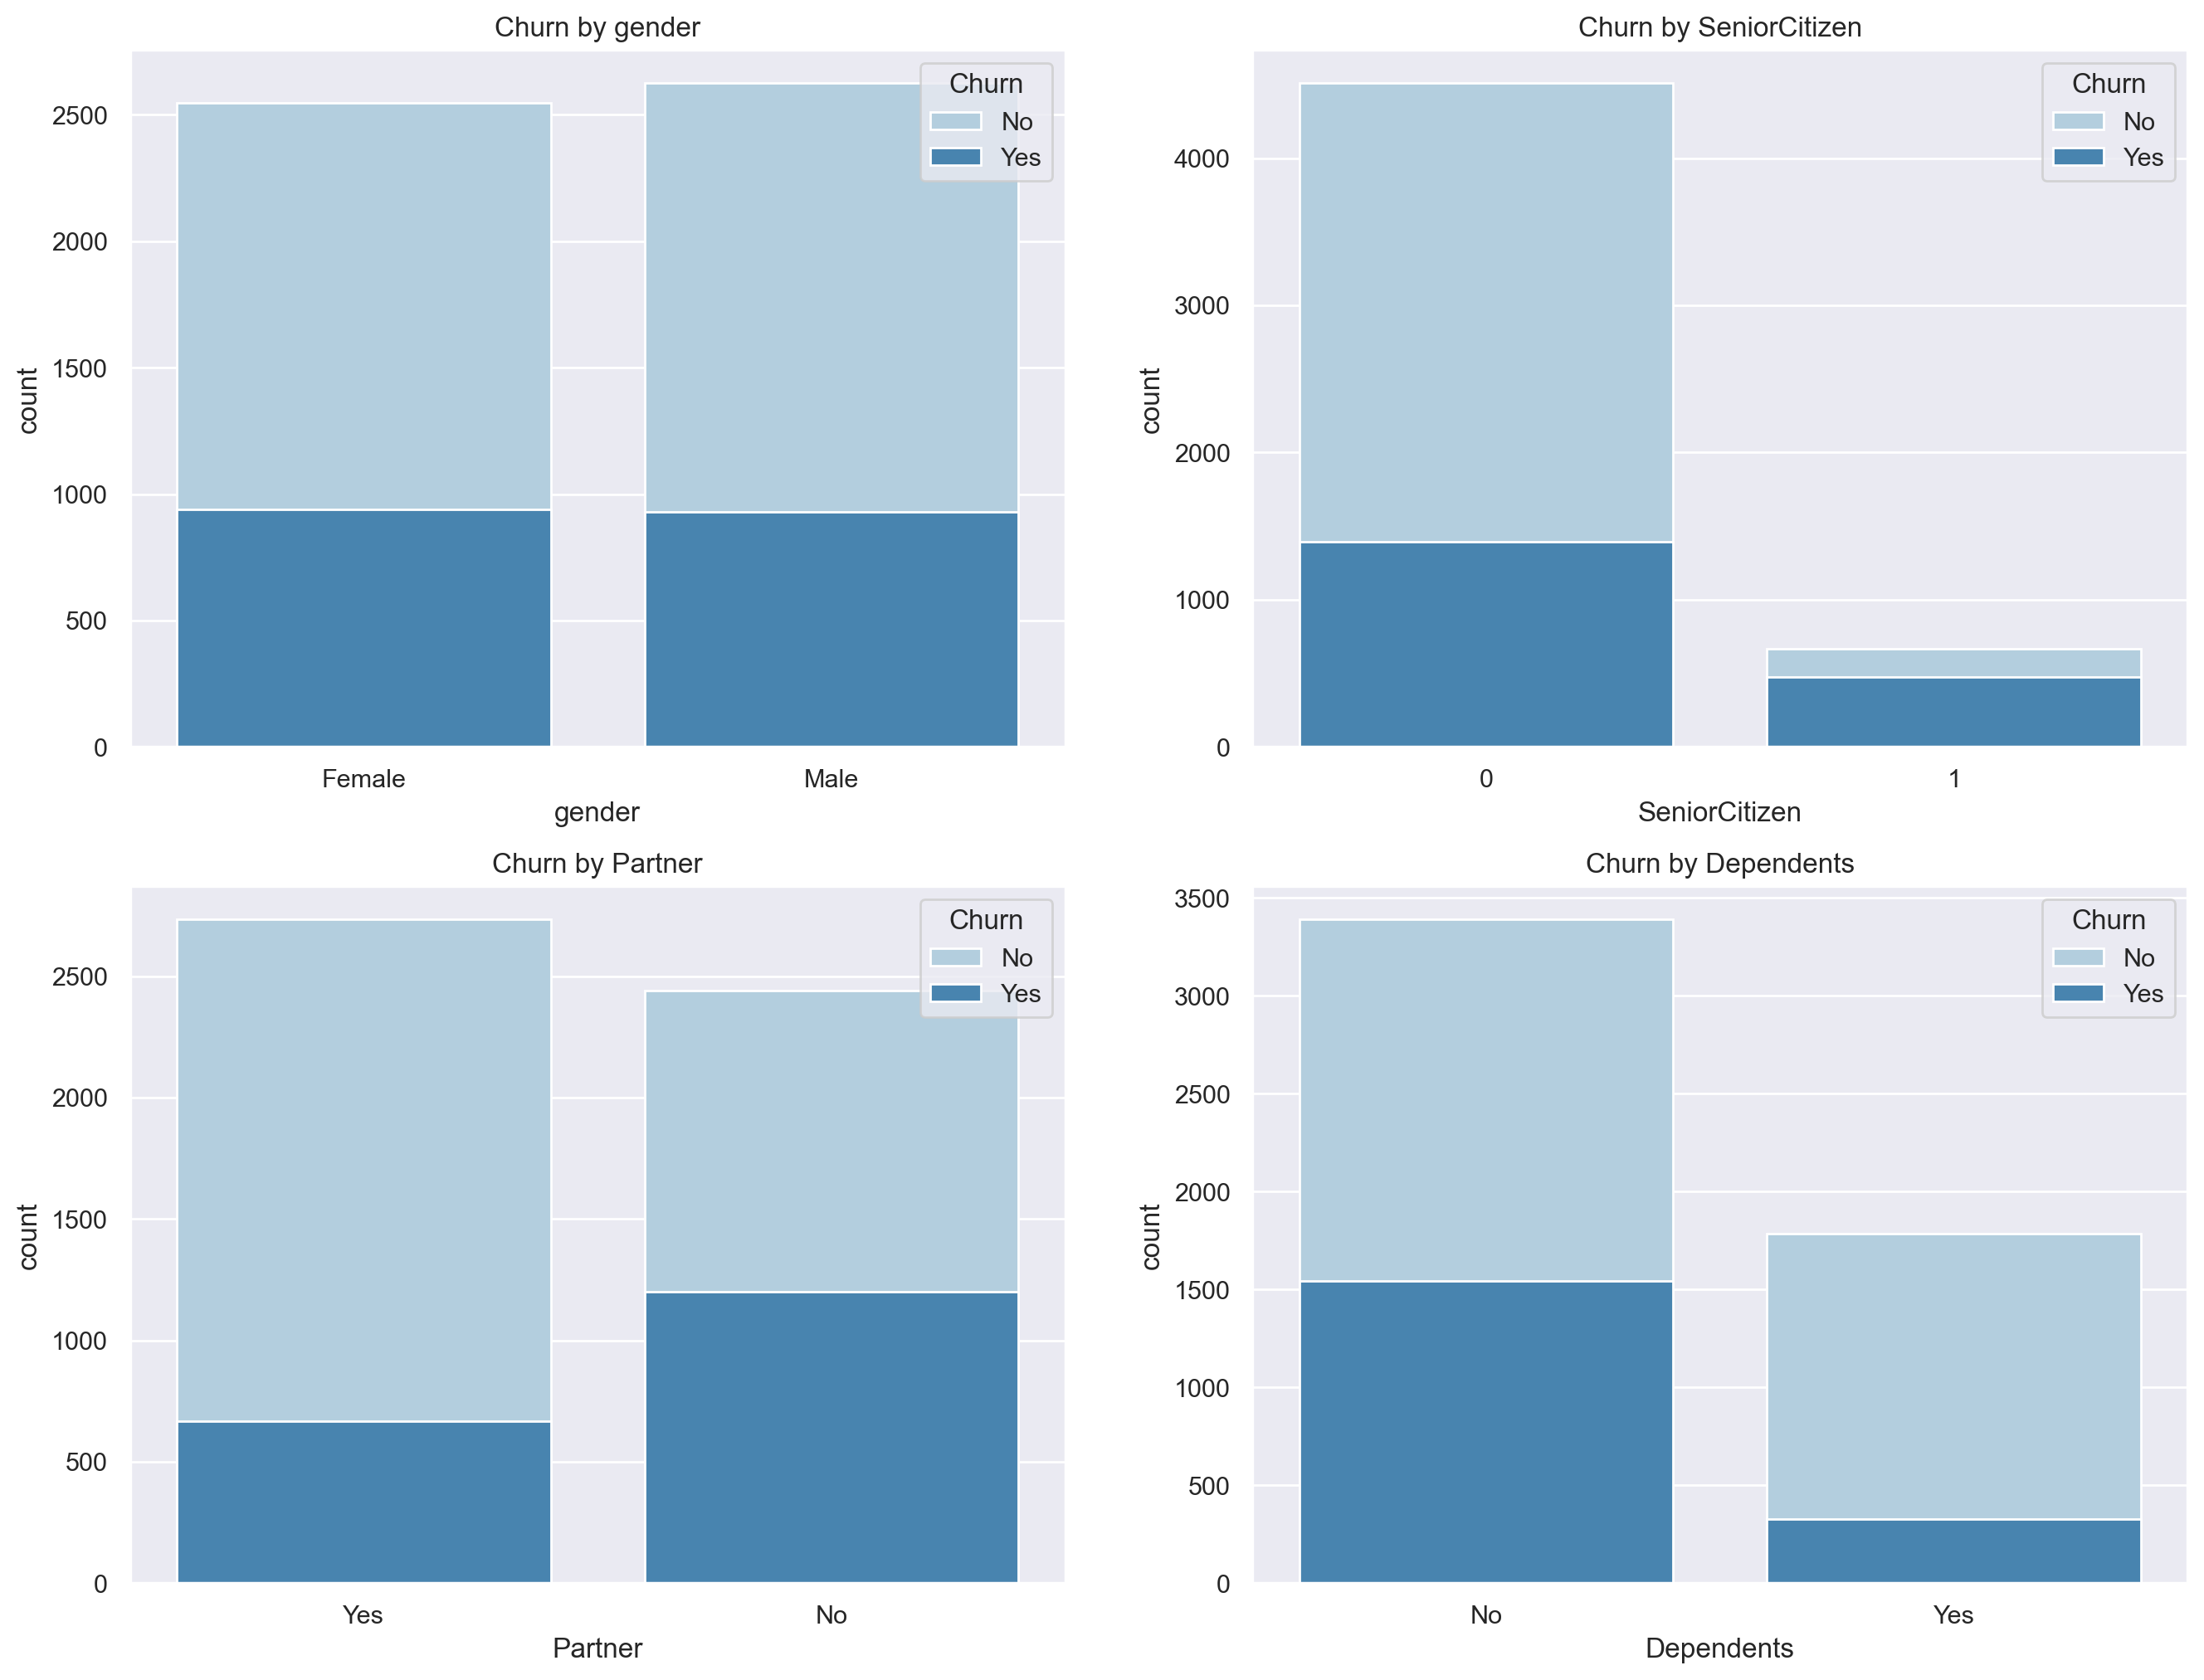

In [36]:
col_1 = ["gender", "SeniorCitizen", "Partner", "Dependents"]

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(16,12), dpi=200)

for i, item in enumerate(col_1):
    plt.subplot(2,2,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=tcc,palette="Blues", dodge=False)
    plt.xlabel(item)
    plt.title("Churn by "+ item)

老年用户、未结婚用户以及经济未独立用户流失比例相对较高，而性别因素对是否流失影响不大。在实际制定运营策略时，这三类用户需要重点关注。

- 已注册的服务信息

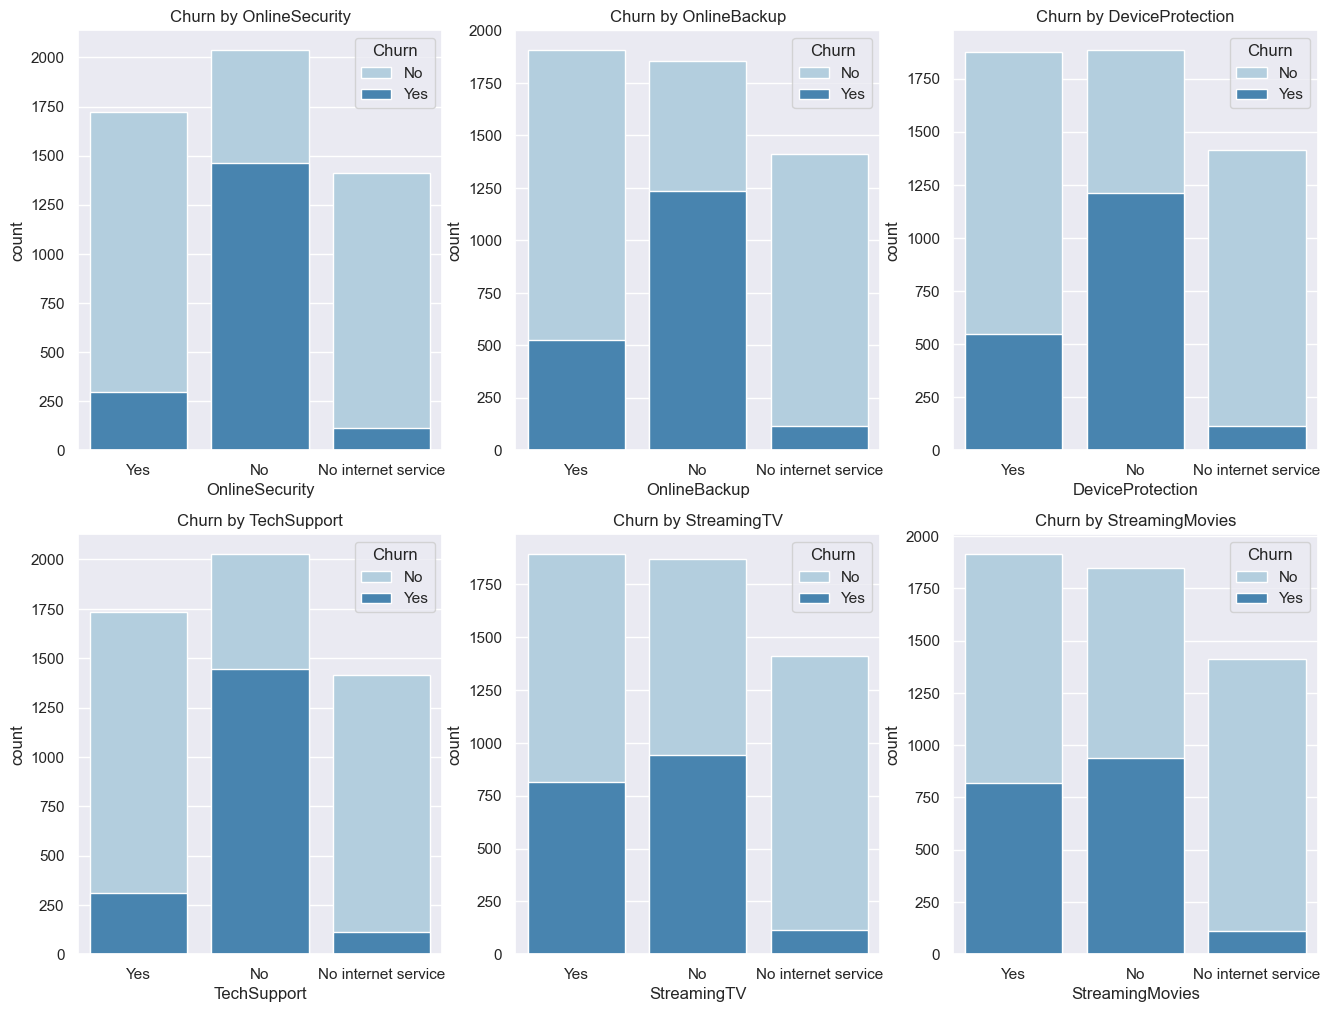

In [37]:
col_2 = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(16,12))

for i, item in enumerate(col_2):
    plt.subplot(2,3,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=tcc,palette="Blues",order=["Yes","No","No internet service"], dodge=False)
    plt.xlabel(item)
    plt.title("Churn by "+ item)

未开通网络服务的用户、以及开通了网络服务并且同时开通很多增值服务的用户往往流失概率较小，而开通网络服务、未开通其他增值服务的用户流失概率较大。因此可以考虑更多的提供免费体验增值服务的机会，增加增值服务宣传，促进用户购买，从而提升用户粘性。

- 用户合同属性

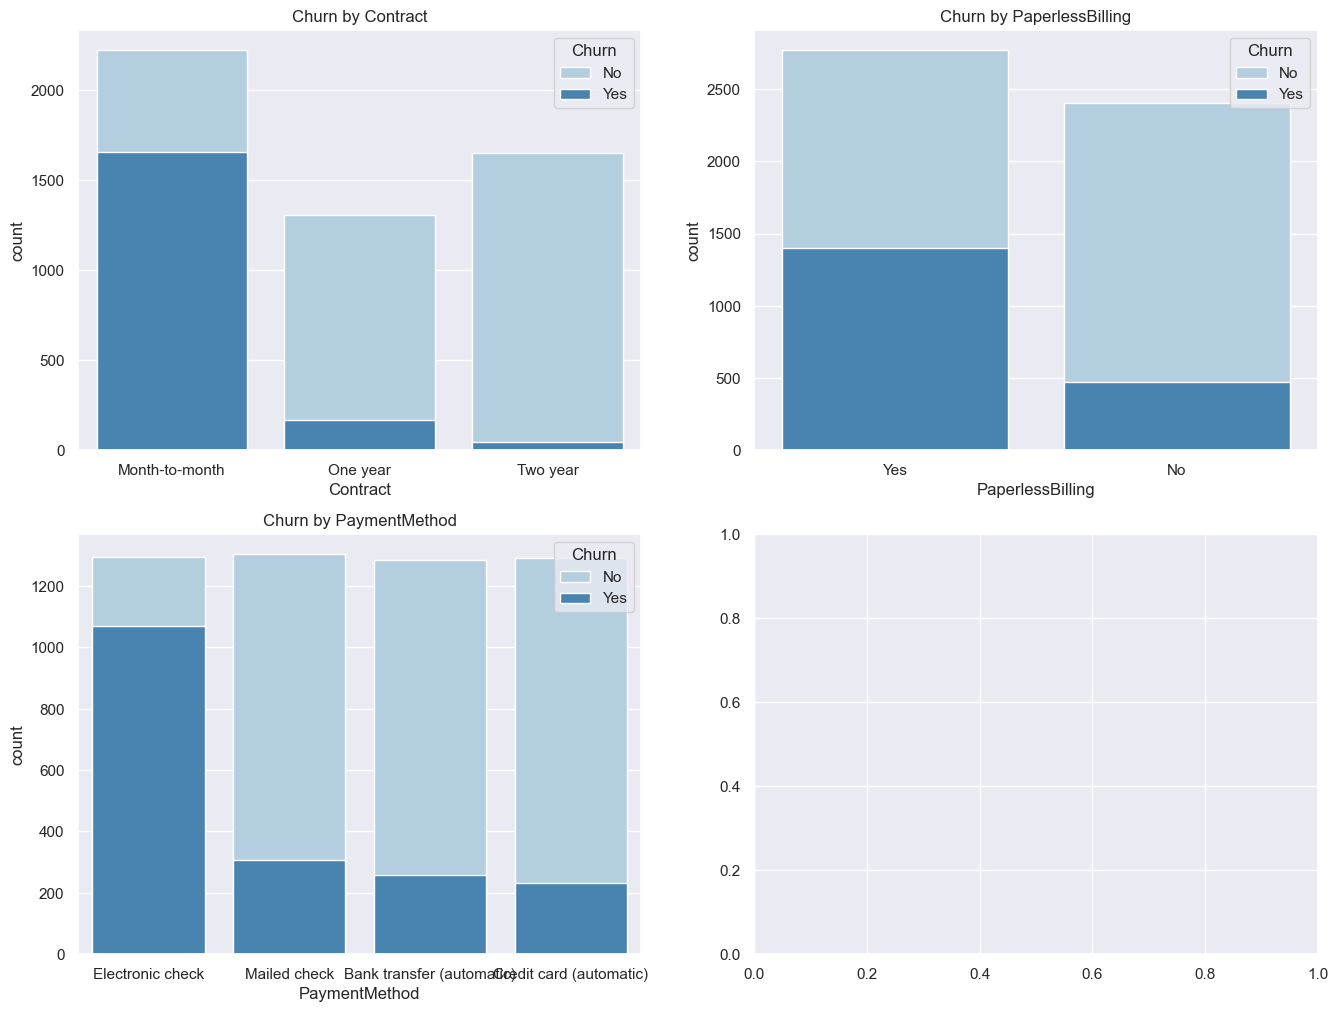

In [38]:
col_3 = ["Contract", "PaperlessBilling", "PaymentMethod"]

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(16,12))

for i, item in enumerate(col_3):
    plt.subplot(2,2,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=tcc,palette="Blues", dodge=False)
    plt.xlabel(item)
    plt.title("Churn by "+ item)

一次性签署服务周期越短的用户越容易流失，并且相比其他支付方式，在线支付的用户更容易流失。因此可能需要在实际运营过程中更多的引导用户签订长期合同，无论是通过折扣还是满赠，借此提升用户生命周期。此外，需要更加关注在线支付用户的实际产品体验，也可以考虑提升在线支付本身的用户体验或者提供更多的价格优惠，以此提升在线支付用户满意度。